In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_10536\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [4]:
print("\nMissing Values:")
print("Books:\n", books.isnull().sum())
print("Users:\n", users.isnull().sum())
print("Ratings:\n", ratings.isnull().sum())


Missing Values:
Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Users:
 User-ID          0
Location         0
Age         110762
dtype: int64
Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [16]:
books.duplicated().sum()
users.duplicated().sum()
ratings.duplicated().sum()

np.int64(0)

## EDA

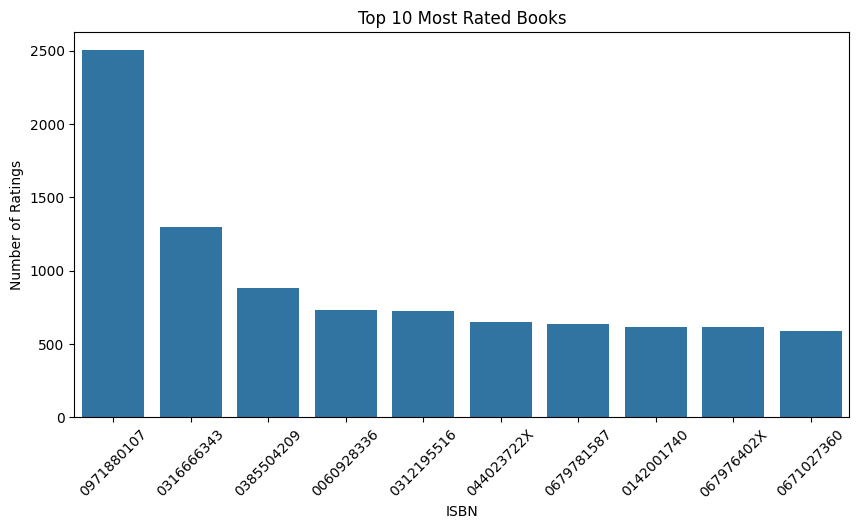

In [17]:
## Books Dataset
# Top 10 most frequently rated books
top_books = ratings['ISBN'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_books.index, y=top_books.values)
plt.title('Top 10 Most Rated Books')
plt.xticks(rotation=45)
plt.xlabel('ISBN')
plt.ylabel('Number of Ratings')
plt.show()

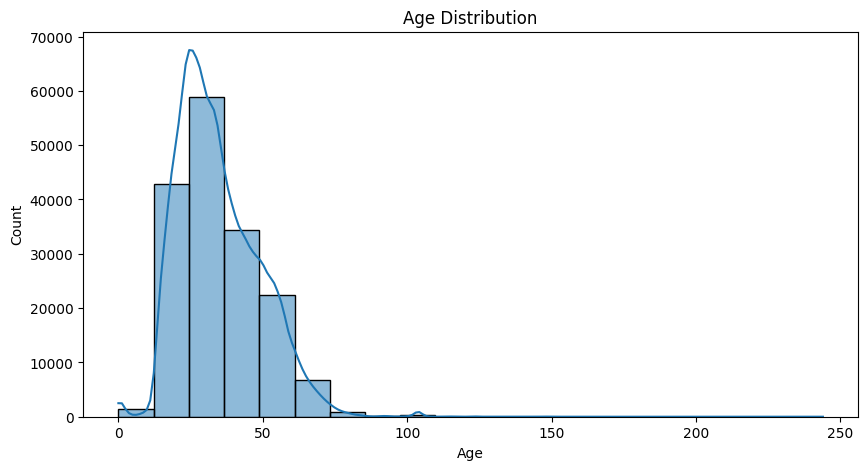

In [32]:
## Users Dataset
# Age distribution
if 'Age' in users.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(users['Age'].dropna(), bins=20, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

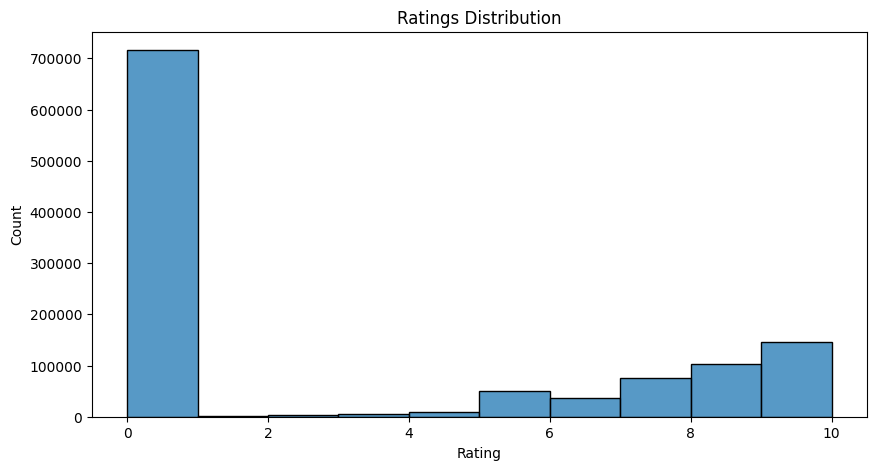

In [20]:
## Ratings Dataset
# Ratings distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings['Book-Rating'], bins=10, kde=False)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [33]:
# Merge datasets for deeper insights
merged_data = ratings.merge(books, on='ISBN').merge(users, on='User-ID')
print("\nMerged Data Info:")
print(merged_data.info())



Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031134 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-S          1031136 non-null  object 
 8   Image-URL-M          1031136 non-null  object 
 9   Image-URL-L          1031132 non-null  object 
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB
None


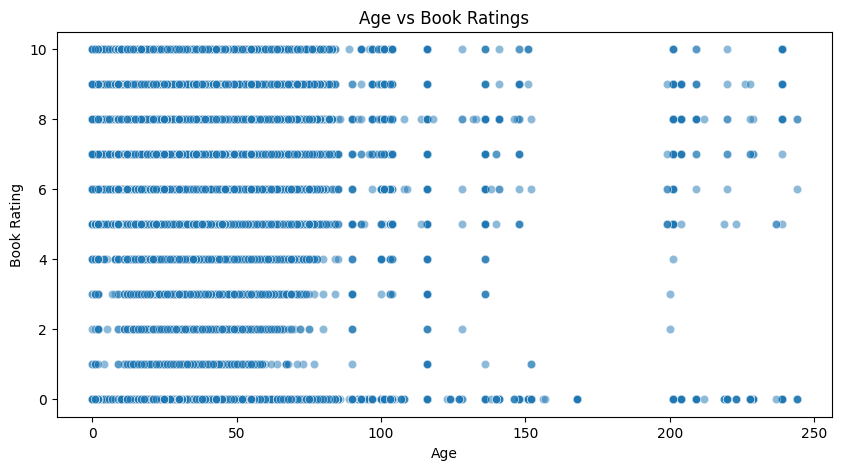

In [22]:
# Analyze correlation between rating and user age
if 'Age' in merged_data.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=merged_data, x='Age', y='Book-Rating', alpha=0.5)
    plt.title('Age vs Book Ratings')
    plt.xlabel('Age')
    plt.ylabel('Book Rating')
    plt.show()

## Popularity Based Recommendation System

In [3]:
ratings_with_name = ratings.merge(books, on='ISBN')

In [4]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns = {'Book-Rating' : 'num_ratings'},inplace = True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [7]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating' : 'avg_rating'},inplace=True)
avg_rating_df

TypeError: agg function failed [how->mean,dtype->object]

In [6]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

NameError: name 'avg_rating_df' is not defined